In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
print(df.Fuel_Type.value_counts())
print(df.Selling_type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder= LabelEncoder()
df['Fuel_Type']= LabelEncoder.fit_transform(df['Fuel_Type'])
df['Selling_type']= LabelEncoder.fit_transform(df['Selling_type'])
df['Transmission']= LabelEncoder.fit_transform(df['Transmission'])

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [13]:
x = df.drop(['Car_Name', 'Selling_Price'], axis=1)

In [14]:
y = df[['Selling_Price']]

In [15]:
print(x)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          2             0             1   
1    2013           9.54       43000          1             0             1   
2    2017           9.85        6900          2             0             1   
3    2011           4.15        5200          2             0             1   
4    2014           6.87       42450          1             0             1   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             1   
297  2015           5.90       60000          2             0             1   
298  2009          11.00       87934          2             0             1   
299  2017          12.50        9000          1             0             1   
300  2016           5.90        5464          2             0             1   

     Owner  
0        0  
1        0  
2        0  

In [16]:
print(y)

     Selling_Price
0             3.35
1             4.75
2             7.25
3             2.85
4             4.60
..             ...
296           9.50
297           4.00
298           3.35
299          11.50
300           5.30

[301 rows x 1 columns]


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.1, random_state=2)

In [18]:
LinearRegression = LinearRegression()

In [19]:
LinearRegression.fit(x_train, y_train)

LinearRegression()

In [20]:
training_data_perdiction= LinearRegression.predict(x_train)

In [21]:
error_score= metrics.r2_score(y_train, training_data_perdiction)

In [22]:
error_score

0.8796483009370212

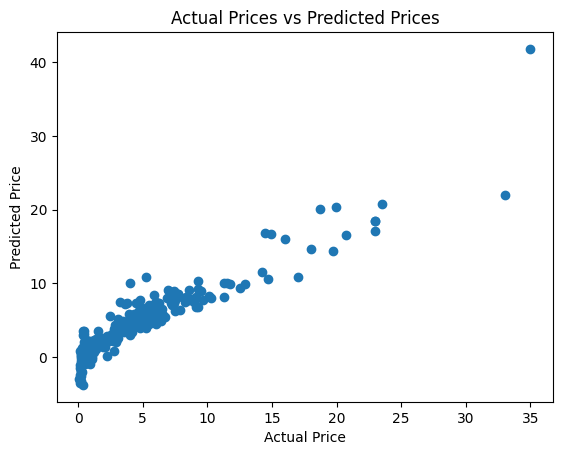

In [23]:
plt.scatter(y_train, training_data_perdiction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [25]:
test_data_prediction= LinearRegression.predict(x_test)

In [26]:
error_score= metrics.r2_score(y_test,test_data_prediction)

In [27]:
error_score

0.8365861023210714

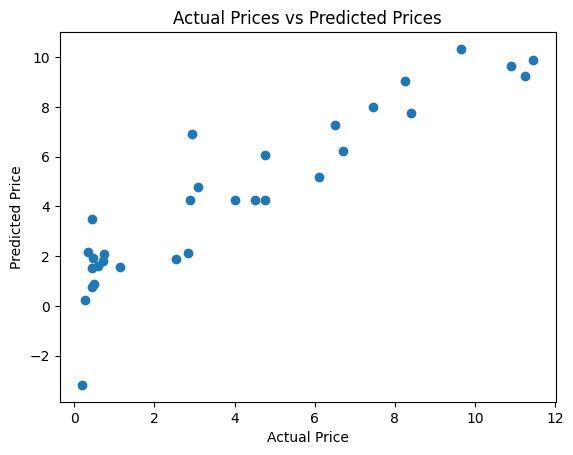

In [28]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [29]:
lasso = Lasso()

In [30]:
lasso.fit(x_train, y_train)

Lasso()

In [31]:
training_data_prediction = lasso.predict(x_train)

In [33]:
error_score= metrics.r2_score(y_train,training_data_prediction)

In [34]:
error_score

0.842448071824074

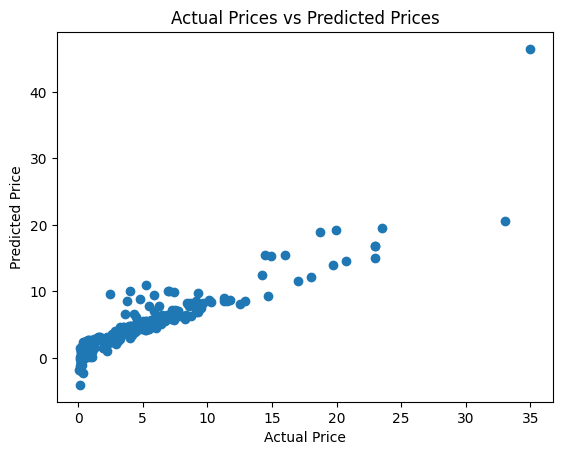

In [36]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [37]:
test_data_prediction=lasso.predict(x_test)

In [43]:
error_score= metrics.r2_score(y_test,test_data_prediction)

In [44]:
error_score

0.8365861023210714

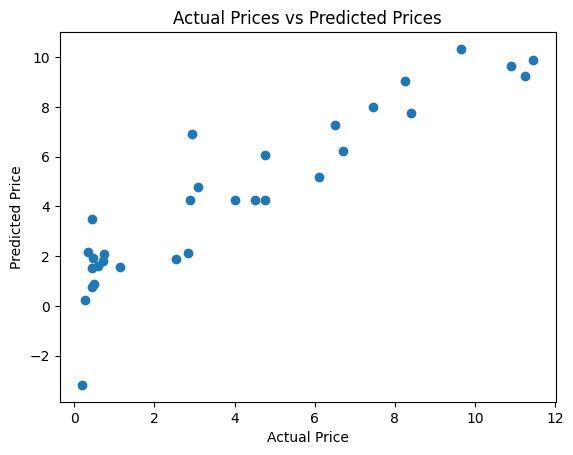

In [45]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()